In [ ]:
import os
from typing import TypedDict, Annotated
from langchain_core.messages import HumanMessage
from langgraph.graph import add_messages, StateGraph, END
from langchain_groq import ChatGroq
from dotenv import load_dotenv

In [2]:
load_dotenv()
os.environ["GROQ_API_KEY"] = os.getenv('Groq') # type: ignore


In [ ]:
class State(TypedDict): 
    messages: Annotated[list, add_messages]


In [7]:
llm = ChatGroq(model="llama-3.1-8b-instant")

In [ ]:
def generate_post(state: State):  
    return { 
        "messages": [llm.invoke(state["messages"])] 
    } 
 
def get_review_decision(state: State):   
    post_content = state["messages"][-1].content  
    print("\n==================Current LinkedIn Post:=====================\n") 
    print(post_content) 
    print("\n") 
    decision = input("Post to LinkedIn? (yes/no): ") 
    # Store the decision in state for the router to use
    return {
        "messages": state["messages"] + [HumanMessage(content=f"User decision: {decision}")]
    }

def route_after_review(state: State):
    # Extract the decision from the last message
    last_message = state["messages"][-1].content
    if "User decision: yes" in last_message:
        return "post"
    else:
        return "collect_feedback"
 
def post(state: State):   
    final_post = state["messages"][-1].content   
    print("\n-----------------Final LinkedIn Post:--------------\n") 
    print(final_post) 
    print("\n✅-----------------Post has been approved and is now live on LinkedIn!-----------------") 
    return final_post  # Return state to maintain consistency
 
def collect_feedback(state: State):   
    feedback = input("How can I improve this post? ") 
    return { 
        "messages": [HumanMessage(content=feedback)] 
    } 

In [ ]:

graph = StateGraph(State) 
 
graph.add_node("generate_post", generate_post) 
graph.add_node("get_review_decision", get_review_decision) 
graph.add_node("collect_feedback", collect_feedback) 
graph.add_node("post", post) 
 
graph.set_entry_point("generate_post") 
graph.add_edge("generate_post", "get_review_decision") 
graph.add_conditional_edges(
    "get_review_decision",  
    route_after_review,  # Use the separate routing function
    {"post": "post", "collect_feedback": "collect_feedback"}
) 
graph.add_edge("post", END) 
graph.add_edge("collect_feedback", "generate_post") 
 
app = graph.compile() 



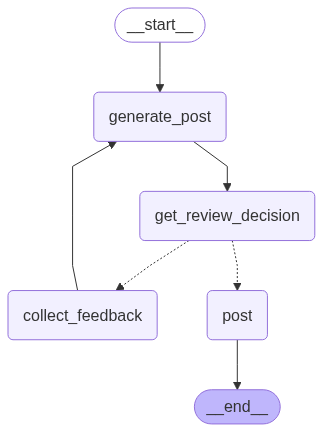

In [15]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [19]:
response = app.invoke({
    "messages": [HumanMessage(content="Write me a LinkedIn post on AI Agents taking over Jobs, use latest examples from news")]
})



📢 Current LinkedIn Post:

**The Future of Work: AI Agents Taking Center Stage**

As we navigate the ever-evolving landscape of technology, one thing is becoming increasingly clear: AI agents are revolutionizing the way we work.

From healthcare to finance, manufacturing to customer service, AI is rapidly automating jobs and transforming industries. But what does this mean for the future of work?

**Recent examples:**

* **Google's AI-powered chatbots**: Just last month, Google announced the launch of its new AI-powered chatbots, designed to assist customers with simple queries. This move is poised to replace thousands of customer service jobs worldwide.
* **Amazon's AI-driven warehouses**: Amazon is pushing the boundaries of automation in its warehouses, using AI-powered robots to sort and package orders. This technology has already reduced staffing needs by up to 50%.
* **UK's AI-powered job centre**: The UK government has announced plans to introduce AI-powered job centres, designed

In [ ]:
# Entire conversation is present in result
print(response["messages"][-2].content)

**Indian Companies Embracing AI and Automation**

As the world grapples with the impact of AI and automation on the workforce, Indian companies are taking proactive steps to stay ahead of the curve.

**Adoption of AI and Automation:**

* **IT and ITeS:**
	+ Tata Consultancy Services (TCS) has invested heavily in AI and automation, with a focus on developing AI-powered chatbots and robotic process automation (RPA) solutions.
	+ Infosys has launched its own AI platform, Nia, which enables businesses to automate processes and improve customer experience.
* **Banking and Finance:**
	+ ICICI Bank has introduced AI-powered chatbots to assist customers with simple queries and transactions.
	+ HDFC Bank has implemented AI-driven systems to detect fraud and improve risk management.
* **Manufacturing and Logistics:**
	+ Tata Motors has adopted AI and automation in its manufacturing processes, leading to increased efficiency and reduced costs.
	+ Mahindra & Mahindra has launched its own AI-powere

In [ ]:
#